In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

# Photometric calibration

Calibration: from fluxes in MJy/sr to magnitudes and fluxes in Jy

585


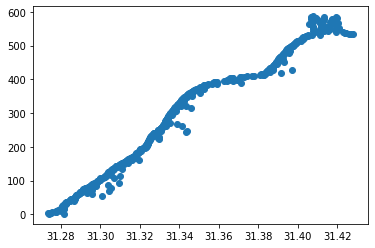

In [2]:
# photcal.txt is the full cleaned catalogue for both bands
data = np.loadtxt('photcal.txt')
raall = data[:,7]
decall = data[:,8]
idall = data[:,6]
flux200_mjsr = data[:,2]
isomag = data[:,10]
isoflux = data[:,11]
medspecflux = data[:,12]
flux150_mjsr = data[:,19]
plt.scatter(decall,idall)
print(len(idall))

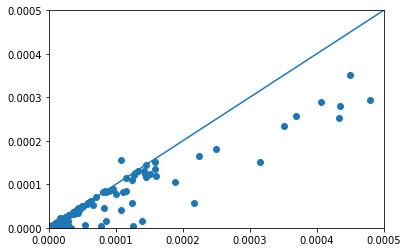

In [3]:
pixar_sr = 1.0091846e-13
photmjsr = 0.25171217
flux200_mj = flux200_mjsr * pixar_sr
flux200_jy = flux200_mj * 1e6
plt.scatter(flux200_jy,isoflux)
plt.xlim(0,0.0005)
plt.ylim(0,0.0005)
plt.plot([0,0.002],[0,0.002])

This compares well with the isoflux in Jy reported by the pipeline.

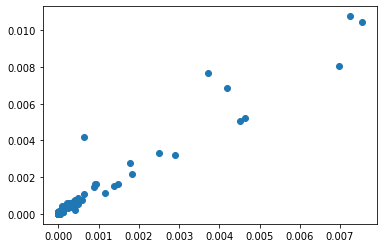

In [4]:
flux150_mj = flux150_mjsr * pixar_sr
flux150_jy = flux150_mj * 1e6
plt.scatter(flux150_jy,flux200_jy)

<ipython-input-5-30b27097f3d8>:2: RuntimeWarning: invalid value encountered in log10
  mag200w = -2.5 * np.log10(flux200_jy / zp200w)


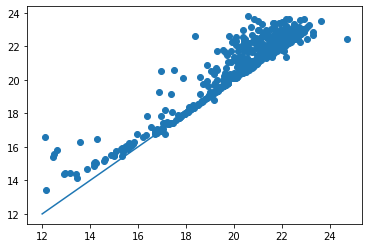

In [5]:
zp200w = 767.0
mag200w = -2.5 * np.log10(flux200_jy / zp200w)
plt.scatter(mag200w,isomag)
plt.plot([12,20],[12,20])

Same with magnitudes - looks good compared to the isomag.

<ipython-input-6-74082c8cd627>:2: RuntimeWarning: invalid value encountered in log10
  mag150w = -2.5 * np.log10(flux150_jy / zp150w)


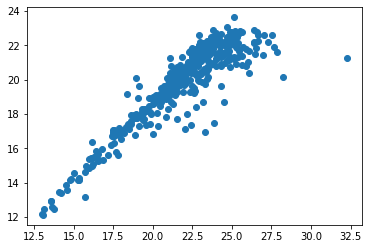

In [6]:
zp150w = 1206.0
mag150w = -2.5 * np.log10(flux150_jy / zp150w)
plt.scatter(mag150w,mag200w)

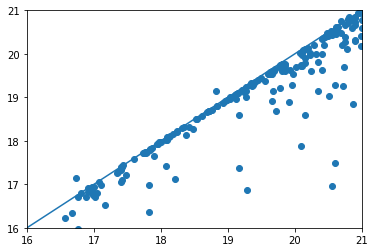

In [7]:
testmag = -2.5 * np.log10(isoflux/zp200w)
plt.scatter(testmag,mag200w)
plt.xlim(16,21)
plt.ylim(16,21)
plt.plot([16,21],[16,21])

Just checking, the iso fluxes from the pipeline give the right magnitudes.

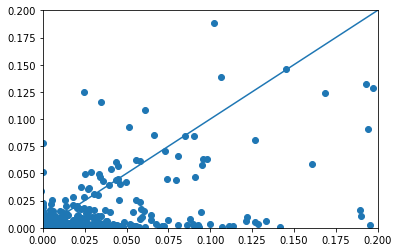

In [8]:
flux200_millijy = flux200_jy * 1000.0
flux150_millijy = flux150_jy * 1000.0
plt.scatter(medspecflux,flux200_millijy)
plt.xlim(0,0.2)
plt.ylim(0,0.2)
plt.plot([0,0.5],[0,0.5])

In [9]:
np.savetxt('n1333_cat_fluxes.cat',np.transpose([idall,raall,decall,flux150_millijy,flux200_millijy]),fmt='%10.6f')

Here we need to get the catalogue matched with UKIDSS

58


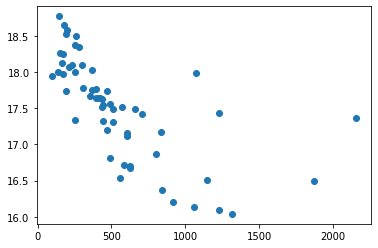

In [10]:
data = np.loadtxt('photcal_ukidss.cat')
rauk = data[:,0]
decuk = data[:,1]
fluxcal200_mjsr = data[:,2]
fluxcal150_mjsr = data[:,19]
hmag = data[:,29]
kmag = data[:,31]
plt.scatter(fluxcal200_mjsr,kmag)
print(len(kmag))

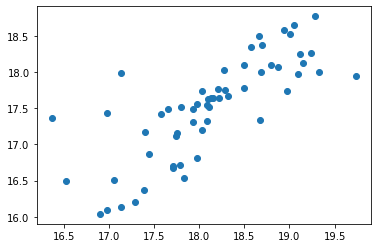

In [11]:
fluxcal200_mj = fluxcal200_mjsr * pixar_sr
fluxcal200_jy = fluxcal200_mj * 1e6
magcal200w = -2.5 * np.log10(fluxcal200_jy / zp200w)
fluxcal150_mj = fluxcal150_mjsr * pixar_sr
fluxcal150_jy = fluxcal150_mj * 1e6
magcal150w = -2.5 * np.log10(fluxcal150_jy / zp150w)
plt.scatter(magcal200w,kmag)

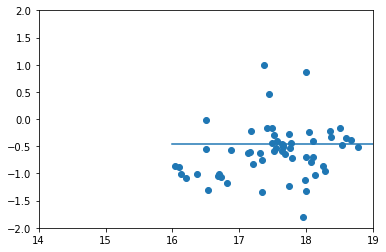

In [12]:
ksub = kmag - magcal200w
plt.scatter(kmag,ksub)
plt.xlim(14,19)
plt.ylim(-2,2)
plt.plot([16,19],[-0.45,-0.45])

For non-saturated objects, Kmag is about 0.45mag brighter than Mag200w

0.5284480771124732
0.39976083315109945
43
0.060962955530513584


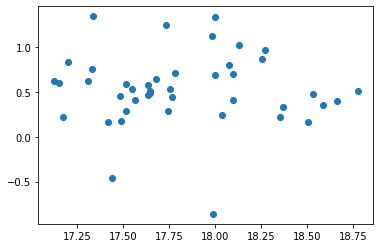

In [13]:
diff = []
testkmag = []
for i in range(len(kmag)):
    if ((kmag[i]>17) & (kmag[i]<19)):
        difference = magcal200w[i]-kmag[i]
        if ((difference<1.5) & (difference>-0.90)):
          diff.append(difference)
          testkmag.append(kmag[i])
plt.scatter(testkmag,diff)
print(np.average(diff))
print(np.std(diff))
print(len(diff))
print(np.std(diff) / math.sqrt(len(diff)))

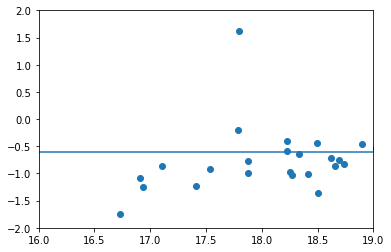

In [14]:
hsub = hmag - magcal150w
plt.scatter(hmag,hsub)
plt.xlim(16,19.0)
plt.ylim(-2,2)
plt.plot([16,19],[-0.6,-0.6])

0.7318352175716799
0.2390503492894808
17
0.05797822588007794


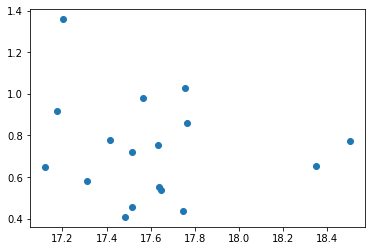

In [15]:
diff = []
testkmag = []
for i in range(len(hmag)):
    if ((kmag[i]>17) & (kmag[i]<19)):
        difference = magcal150w[i]-hmag[i]
        if ((difference<1.5) & (difference>-0.5)):
          diff.append(difference)
          testkmag.append(kmag[i])
plt.scatter(testkmag,diff)
print(np.average(diff))
print(np.std(diff))
print(len(diff))
print(np.std(diff) / math.sqrt(len(diff)))

Now apply the offsets determined from the UKIDSS objects to the full catalogue.

(0.0, 4.0)

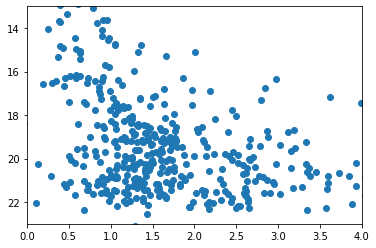

In [16]:
kmagall = mag200w - 0.53
hmagall = mag150w - 0.73
plt.scatter((hmagall-kmagall), kmagall)
plt.ylim(23,13)
plt.xlim(0,4)

In [17]:
np.savetxt('n1333_cat_mags.cat',np.transpose([idall,raall,decall,mag150w,mag200w,hmagall,kmagall]),fmt='%10.6f')

# Plot absolute magnitude vs spectral type

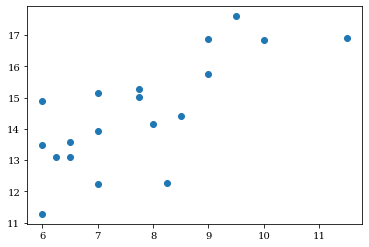

In [13]:
data = np.loadtxt('longlist_luhman.cat')
idknown = data[:,0]
sptold = data[:,5]
kmagold = data[:,6]
aj = data[:,8]
# ak = aj * 0.382
ak = aj * (0.078 / 0.243)
kmagderold = kmagold - ak
ir = data[:,9]
plt.scatter(sptold,kmagderold)

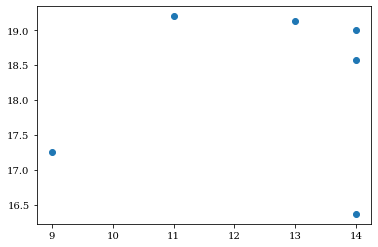

In [14]:
id  = np.array([382, 67, 393, 482, 519, 586])
spt = np.array([14,11,9,13,14,14])
av  = np.array([14.5, 0.0, 6.0, 4.0, 11.0, 7.5])
mag = np.array([18.57, 19.20, 17.25, 19.13, 16.37, 19.00])
plt.scatter(spt,mag)

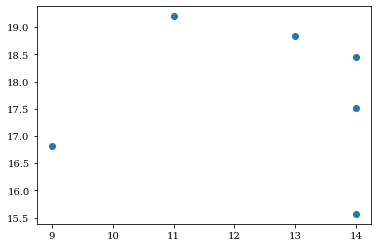

In [15]:
# ak = av / 9.3
# Mathis 1990, assuming Rv 3.1. Would be 8.0 for Rv 5.0
ak = av * 0.073 # Wang 2019
distmod = 7.4
kder = mag - ak
plt.scatter(spt,kder)

In [16]:
sptvlg = np.arange(5,26)
abskvlg = 5.233 + 0.4465 * sptvlg
kvlg = abskvlg + distmod

sptyng = np.arange(5,26)
abskyng = 5.698 + 0.2488*sptyng + 0.051267*sptyng**2 - 0.0039699*sptyng**3 + 0.000084*sptyng**4
kyng = abskyng + distmod
# this is all from Sanghi, Liu, Best 2023, RMS of this last relation 0.597

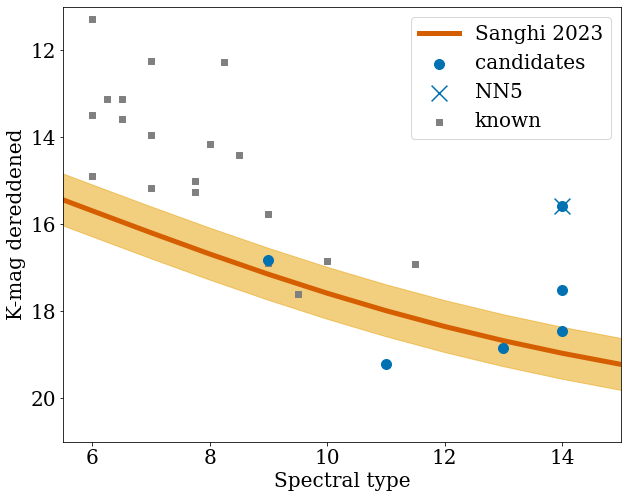

In [18]:
plt.figure(figsize=(10,8))
plt.ylim(21,11)
plt.xlim(5.5,15.0)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.rc('font', family='serif')
plt.xlabel('Spectral type',fontsize=20)
plt.ylabel('K-mag dereddened',fontsize=20)
plt.scatter(spt,kder,s=100,color=(0/255,114/255,178/255),label='candidates',zorder=3)
plt.scatter(spt[4],kder[4],s=250,marker='x',color=(0/255,114/255,178/255),label='NN5',zorder=3)
plt.scatter(sptold,kmagderold,color='gray',marker='s',label='known',zorder=2)
plt.plot(sptyng,kyng,linewidth=5,color=(213/255,94/255,0/255),label='Sanghi 2023',zorder=1)
plt.fill_between(sptyng,kyng-0.597,kyng+0.597,alpha=0.5,color=(230/255,159/255,0/255))
plt.legend(loc=1,fontsize=20)
plt.savefig('phot_shortlist.pdf',bbox_inches='tight')

# Make histogram figure.

In [23]:
data = np.loadtxt('longlist_bgsub.txt')
idlong = data[:,0]
ralong = data[:,1]
declong = data[:,2]
print(idlong)

[ 11.  19.  20.  29.  35.  37.  46.  48.  52.  57.  64.  66.  67.  70.
  76.  85.  86.  87.  88. 102. 104. 107. 119. 125. 126. 135. 137. 145.
 146. 154. 156. 162. 174. 175. 177. 186. 189. 201. 203. 210. 214. 225.
 229. 234. 238. 261. 262. 270. 273. 274. 280. 295. 296. 304. 305. 306.
 320. 322. 335. 351. 359. 370. 371. 382. 384. 393. 402. 406. 407. 411.
 412. 421. 422. 437. 440. 442. 445. 451. 453. 454. 457. 462. 463. 464.
 468. 471. 479. 482. 483. 491. 492. 493. 495. 498. 508. 510. 517. 519.
 520. 521. 524. 529. 531. 536. 537. 538. 540. 542. 543. 555. 567. 573.
 576. 586.]


In [24]:
count = 0
kmaglong = np.zeros(len(idlong))
for i in range(len(idlong)):
    id = idlong[i]
    for j in range(len(idall)):  
        if id == idall[j]:
            kmaglong[count]=kmagall[j]
            count = count + 1
print(kmaglong)
            

[16.18412751 21.99474738 16.37533386 17.55331618 21.93283093 20.40551149
 16.60693258 20.21827002 18.42315254 18.34250098 14.98069592 21.74772183
 19.2090069  21.06013247 17.40169251 16.4510518  20.80896533 16.28465759
 14.7822475  17.49882663 20.85817831 15.83813791 19.81991989 17.9690442
 21.82495431 14.91746629 19.53117161 17.21609444 21.2073173  21.94440957
 16.86974042 16.18312354 16.73024548 17.4975384  18.60424907 21.4664686
 18.04386603 17.17996613 22.16287925 17.05271483 17.75720721 15.43387037
 14.47395578 19.01771369 21.65530325 17.44349034 13.75716548 14.84585092
 18.13505369 20.75692857 21.23005313 16.41870481 22.09748765 20.8434582
 19.66924474 16.29771814 15.68959093 14.34340245 16.57033158 15.31855532
 14.07664846 14.54943607 21.44104196 18.56754716 21.43317528 17.25272849
 21.05914791 15.08996442 16.91184068 21.36716316 15.15839063 16.16958904
 20.87082636 18.39174653 21.60813982 18.1591717  16.41242178 14.46074748
 22.43655304 17.2741256  16.52721325 20.07900746 19.22

In [25]:
data = np.loadtxt('longlist_new_faint_objects.txt')
idfaint = data[:]
print(idfaint)

[ 19.  35.  70. 104. 126. 146. 154. 186. 203. 238. 274. 280. 296. 304.
 384. 422. 464. 576.]


In [26]:
count = 0
kmagfaint = np.zeros(len(idfaint))
for i in range(len(idfaint)):
    id = idfaint[i]
    for j in range(len(idall)):  
        if id == idall[j]:
            kmagfaint[count]=kmagall[j]
            count = count + 1
print(kmagfaint)

[21.99474738 21.93283093 21.06013247 20.85817831 21.82495431 21.2073173
 21.94440957 21.4664686  22.16287925 21.65530325 20.75692857 21.23005313
 22.09748765 20.8434582  21.43317528 20.87082636 21.57918913 22.03992996]


In [27]:
print(len(kmagall))
print(len(raall))
print(len(decall))
print(len(idlong))
print(len(kmaglong))
print(len(idfaint))
print(len(kmagfaint))

585
585
585
114
114
18
18


[ 7  4 15 15 17 15 23 27 46 46 61 69 94 69 37  5]
[15.  15.5 16.  16.5 17.  17.5 18.  18.5 19.  19.5 20.  20.5 21.  21.5
 22.  22.5 23. ]


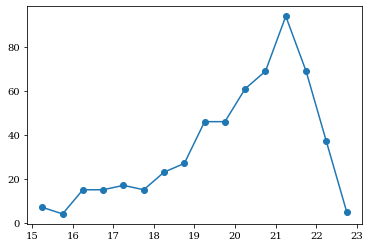

In [28]:
all_hist,binlist = np.histogram(kmagall,bins=16,range=(15,23))
print(all_hist)
print(binlist)
binlist = binlist + 0.25
plt.scatter(binlist[0:len(binlist)-1],all_hist)
plt.plot(binlist[0:len(binlist)-1],all_hist)

[ 7  4 15 15 17 15 23 27 46 46 61 69 94 69 37  5]
[15.  15.5 16.  16.5 17.  17.5 18.  18.5 19.  19.5 20.  20.5 21.  21.5
 22.  22.5 23. ]


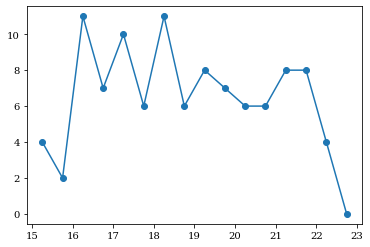

In [29]:
long_hist,binlist = np.histogram(kmaglong,bins=16,range=(15,23))
print(all_hist)
print(binlist)
binlist = binlist + 0.25
plt.scatter(binlist[0:len(binlist)-1],long_hist)
plt.plot(binlist[0:len(binlist)-1],long_hist)

[ 7  4 15 15 17 15 23 27 46 46 61 69 94 69 37  5]
[15.  15.5 16.  16.5 17.  17.5 18.  18.5 19.  19.5 20.  20.5 21.  21.5
 22.  22.5 23. ]


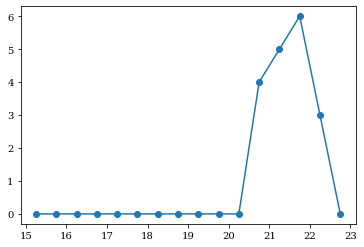

In [30]:
long_hist,binlist = np.histogram(kmagfaint,bins=16,range=(15,23))
print(all_hist)
print(binlist)
binlist = binlist + 0.25
plt.scatter(binlist[0:len(binlist)-1],long_hist)
plt.plot(binlist[0:len(binlist)-1],long_hist)

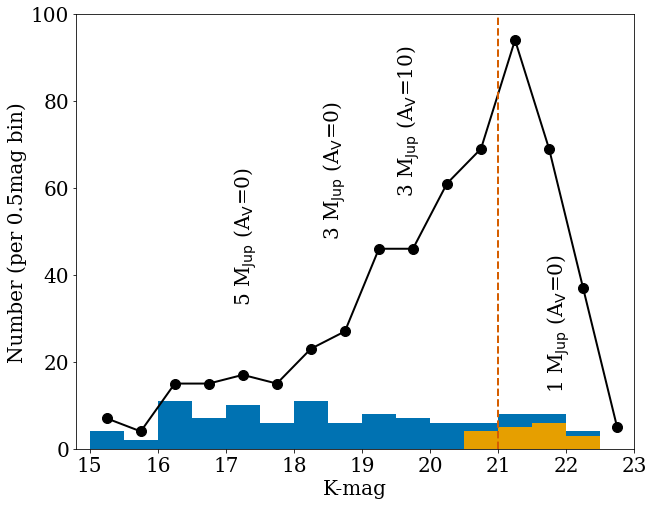

In [32]:
plt.figure(figsize=(10,8))
plt.ylim(0,100)
plt.xlim(14.8,23)
plt.rc('font', family='serif')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('K-mag',fontsize=20)
plt.ylabel('Number (per 0.5mag bin)',fontsize=20)
plt.scatter(binlist[0:len(binlist)-1],all_hist,s=100,color='black')
plt.plot(binlist[0:len(binlist)-1],all_hist,linewidth=2,color='black')
plt.plot([21,21],[0,100],linewidth=2,linestyle='dashed',color=(213/255,94/255,0/255))
plt.hist(kmaglong,bins=16,range=(15,23),color=(0/255,114/255,178/255))
plt.hist(kmagfaint,bins=16,range=(15,23),color=(230/255,159/255,0/255))
plt.text(17.1,35,r'5 M$_{\rm Jup}$ (A$_{\rm V}$=0)',fontsize=20,rotation='vertical')
plt.text(18.4,50,r'3 M$_{\rm Jup}$ (A$_{\rm V}$=0)',fontsize=20,rotation='vertical')
plt.text(19.5,60,r'3 M$_{\rm Jup}$ (A$_{\rm V}$=10)',fontsize=20,rotation='vertical')
plt.text(21.7,15,r'1 M$_{\rm Jup}$ (A$_{\rm V}$=0)',fontsize=20,rotation='vertical')
plt.savefig('phot_histogram.pdf',bbox_inches='tight')

# Spectral type comparison 

[ 11.  20.  64.  88. 125. 135. 145. 162. 214. 225. 262. 270. 295. 351.
 406. 407. 445. 457. 479.]
[0.9  1.1  1.2  6.2  3.   1.5  0.85 1.2  0.28 1.6  4.9  0.56 0.54 0.99
 4.   0.   2.5  2.1  2.8 ]
[ 7.75  9.    6.5   6.   11.5   6.   10.    6.    9.5   7.    7.    6.25
  7.    6.5   8.25  9.    7.75  8.5   8.  ]
6.2 4.9 4.0
52.229118 52.269299 52.261741
31.304243 31.341278 31.37141
6.119999999999999


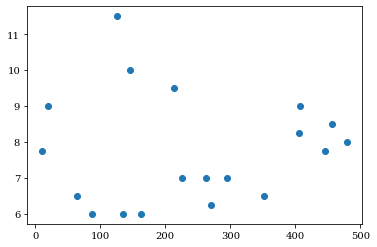

In [19]:
data = np.loadtxt('longlist_luhman.cat')
idknown = data[:,0]
sptold = data[:,5]
aj = data[:,8]
ir = data[:,9]
plt.scatter(idknown,sptold)
print(idknown)
print(aj)
print(sptold)
print(aj[3],aj[10],aj[14])
ra = data[:,1]
dec = data[:,2]
print(ra[3],ra[10],ra[14])
print(dec[3],dec[10],dec[14])
print(0.0017 * 3600)

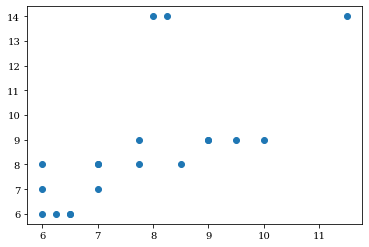

In [20]:
sptnew = np.array([9.0,9.0,6.0, 7.0,14.0,8.0,9.0,6.0,9.0,7.0, 8.0,6.0,8.0,6.0,14.0,9.0,8.0,8.0,14.0])
Avnew  = np.array([0.5,4.0,4.5,19.0, 0.5,3.0,7.5,5.0,3.0,8.5,15.5,0.5,1.5,4.5, 1.5,2.5,6.5,8.5, 0.5])
Ajnew = Avnew * 0.243
plt.scatter(sptold,sptnew)

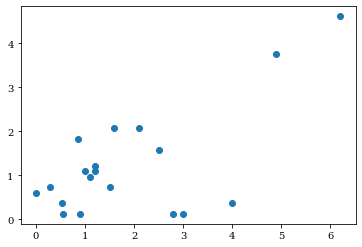

In [21]:
plt.scatter(aj,Ajnew)

In [22]:
spt406 = np.array([14,8])
av406 = np.array([1.5,14.0])
aj406 = av406 * 0.243
spt479 = np.array([14,7])
av479 = np.array([0.5,15.5])
aj479 = av479 * 0.243

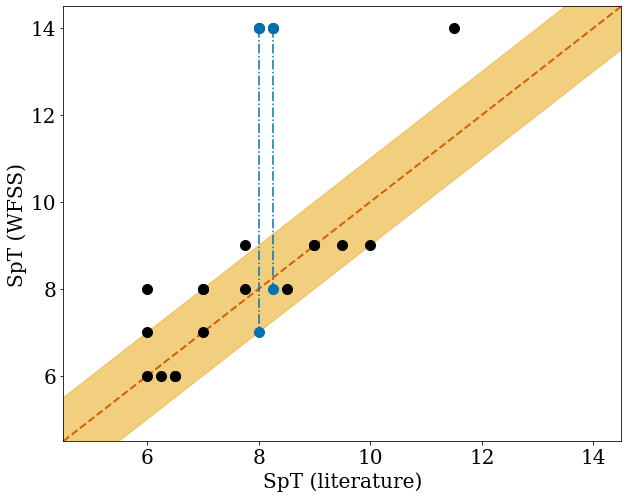

In [28]:
plt.figure(figsize=(10,8))
plt.ylim(4.5,14.5)
plt.xlim(4.5,14.5)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.rc('font', family='serif')
plt.xlabel('SpT (literature)',fontsize=20)
plt.ylabel('SpT (WFSS)',fontsize=20)
plt.scatter(sptold,sptnew,s=100,color='black',zorder=3)
plt.plot([4.5,14.5],[4.5,14.5],linewidth=2,linestyle='dashed',color=(213/255,94/255,0/255),zorder=1)
plt.fill_between([4.5,14.5],[3.5,13.5],[5.5,15.5],alpha=0.5,color=(230/255,159/255,0/255))
plt.scatter([8.25,8.25],spt406,s=100,color=(0/255,114/255,178/255),zorder=4)
plt.plot([8.25,8.25],spt406,linestyle='dashdot',color=(0/255,114/255,178/255))
plt.scatter([8.0,8.0],spt479,s=100,color=(0/255,114/255,178/255),zorder=4)
plt.plot([8.0,8.0],spt479,linestyle='dashdot',color=(0/255,114/255,178/255))
plt.savefig('spt_comp.pdf',bbox_inches='tight')

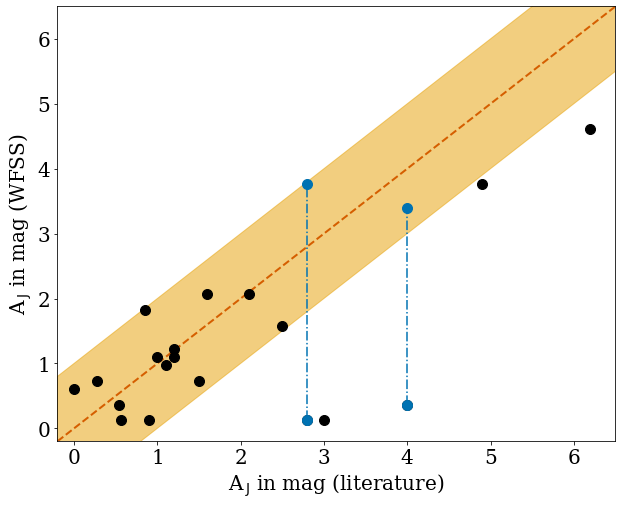

In [29]:
plt.figure(figsize=(10,8))
plt.ylim(-0.2,6.5)
plt.xlim(-0.2,6.5)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.rc('font', family='serif')
plt.xlabel(r'A$_{\rm\,J}$ in mag (literature)',fontsize=20)
plt.ylabel(r'A$_{\rm\,J}$ in mag (WFSS)',fontsize=20)
plt.scatter(aj,Ajnew,s=100,color='black',zorder=3)
plt.plot([-0.2,6.5],[-0.2,6.5],linewidth=2,linestyle='dashed',color=(213/255,94/255,0/255),zorder=1)
plt.fill_between([-0.2,6.5],[-1.2,5.5],[0.8,7.5],alpha=0.5,color=(230/255,159/255,0/255))
plt.scatter([4.0,4.0],aj406,s=100,color=(0/255,114/255,178/255),zorder=4)
plt.plot([4.0,4.0],aj406,linestyle='dashdot',color=(0/255,114/255,178/255))
plt.scatter([2.8,2.8],aj479,s=100,color=(0/255,114/255,178/255),zorder=4)
plt.plot([2.8,2.8],aj479,linestyle='dashdot',color=(0/255,114/255,178/255))
plt.savefig('aj_comp.pdf',bbox_inches='tight')

## SED figure for 519

In [35]:
mag519 = np.array([20.74,18.73,16.37,14.37,13.58,12.98, 12.50])
magots44 = np.array([16.65, 15.52, 14.61, 13.69, 13.22, 12.68, 12.10])
wl = np.array([1.25,1.63,2.20,3.6,4.5,5.8, 8.0])
zp = np.array([1594., 1024., 666., 281., 180., 115., 64.0])

Photometry from Vizier, various sources.

In [36]:
avfit = 10.0
ext = (wl/1.25)**(-1.61) * 0.3088 * avfit
mag519dered = mag519 - ext

In [37]:
flux519 = 1000 * zp * 10**(mag519 / -2.5)
flux519dered = 1000 * zp * 10**(mag519dered / -2.5)
fluxots44 = 1000 * zp * 10**(magots44 / -2.5)
fluxots44sc = fluxots44 / 4.5

In [38]:
nirissflux519 = np.array([0.017953,0.084797])
nirisswl = np.array([1.498,1.984])

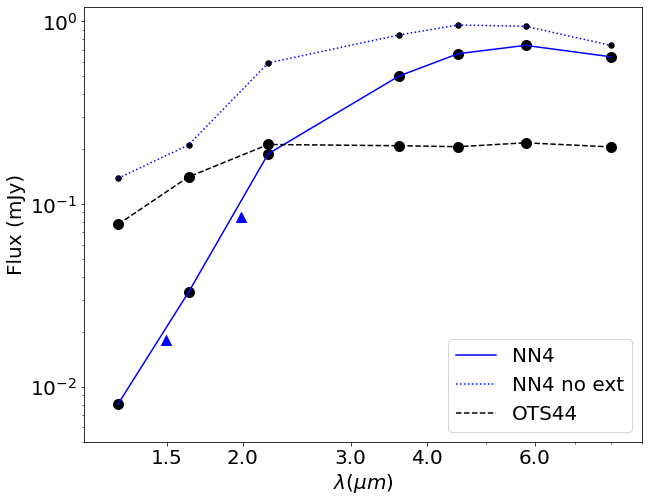

In [39]:
plt.figure(figsize=(10,8))
plt.ylim(0.005,1.2)
plt.xlim(1.1,9.0)
plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'$\lambda (\mu m)$',fontsize=20)
plt.ylabel('Flux (mJy)',fontsize=20)

plt.scatter(wl,flux519,s=100,color='black')
plt.plot(wl,flux519,color='blue',label='NN4')
plt.scatter(nirisswl,nirissflux519,marker='^',s=100,color='blue')
plt.scatter(wl,flux519dered,s=30,color='black')
plt.plot(wl,flux519dered,color='blue',linestyle=':',label='NN4 no ext')

plt.scatter(wl,fluxots44sc,s=100,color='black')
plt.plot(wl,fluxots44sc,color='black',label='OTS44',linestyle='--')

plt.xticks([1.5,2.0,3.0,4.0,6.0],['1.5','2.0','3.0','4.0','6.0'],fontsize=20)
plt.yticks(fontsize=20)

plt.legend(loc=4,fontsize=20)
plt.savefig('sed.pdf')


In [248]:
print(3600*math.sqrt(0.000132**2 + 0.000209**2))

0.8898993201480716


In [7]:
print(2.2 * 60)
print(7 * 132**2)
print(585 / 132968)
print(3.1415 * 0.6**2)
print(0.0044 * 3)

132.0
121968
0.0043995547800974675
1.13094
0.0132
